In [ ]:
using QuantumAnnealingTools
using Plots

# HybridOhmic bath and MRT example

In this example, we will try to recreate figure 2(a) of reference [Lanting et al.](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.83.180502) with a hybrid noise model of both slow part and Ohmic part. In the simulation, we choose
\begin{align}
    W &= 22 (\mathrm{mK}) \\
    T &= 21 (\mathrm{mK}) \\
    f_c &= 8(\mathrm{GHz}) \\
    2\pi\eta &= 0.41
\end{align}
It is important to notice that the definition of $\eta$ here is not consistent with the notation used in the reference paper. There is a factor of $2\pi$. 

Additionally, we assume the system Hamiltonian has the form of
\begin{equation}
    H_S = -\frac{\epsilon}{2}\sigma_z - \frac{\Delta}{2}\sigma_x
\end{equation}
The following code block defines the `HybridOhmicBath` object.

In [10]:
W = 22
η = 0.41/2/π
T = 21
fc = 8

# The unit of Δ is GHz
Δ = 2*π*3.15 / 1000

bath = HybridOhmic(W, η, fc, T)

Hybrid Ohmic bath instance:
W (mK): 22.0
ϵl (GHz): 0.2401171504038241
η (unitless): 0.06525352666767709
ωc (GHz): 8.0
T (mK): 21.0
ϵ (GHz): 0.7621453637452407

To calculate the MRT rate, we need to first assume a system bath coupling Hamiltonian of the form
\begin{equation}
    H_{SB} = \frac{1}{2}\sigma_z \otimes B
\end{equation}
and $\Delta \ll 1$. Before plotting the entire MRT lineshape, we can calculate the low-frequency and high-frequency lineshapes separately using `Gₗ` and `Gₕ`. Let's first plot the Gaussian and Lorentzian lineshape respectively.

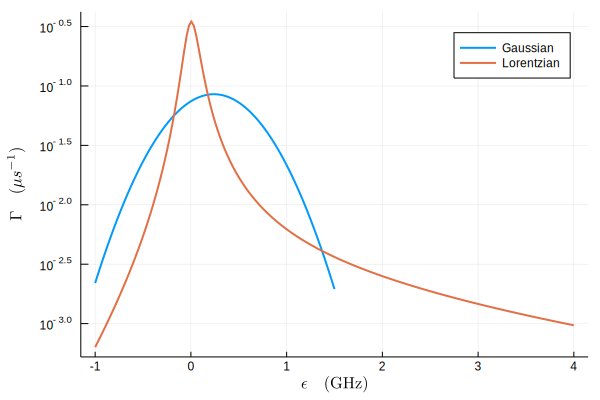

In [37]:
# here is unit for axis is GHz
x_axis_low = range(-1,1.5,length=100)
x_axis = range(-1,4,length=200)
# the unit of y-axis needs to be converted to MHz
high_freq = [Gₕ(2*π*x, bath)*Δ^2/4*1000 for x in x_axis]
low_freq = [Gₗ(2*π*x, bath)*Δ^2/4*1000 for x in x_axis_low]
plot(x_axis_low, low_freq, yscale=:log10, label="Gaussian", linewidth=2)
plot!(x_axis, high_freq, yscale=:log10, label="Lorentzian", linewidth=2)
xlabel!(L"\epsilon \quad (\mathrm{GHz})")
ylabel!(L"\Gamma \quad (\mu s^{-1})")

Then we can calculate the MRT rate with function `MRT_Γ`. We can plot the profile of the hybrid noise together with Gaussian and Lorentzian lineshape. It is important to emphasize that this function is only valid for small $\Delta$. For the case where $\Delta$ is not negligible, a corrected formula can be used. (eq (102) in [Smirnov and Amin](https://iopscience.iop.org/article/10.1088/1367-2630/aae79c))

In [35]:
mrt = [MRT_Γ(2π*x, Δ, bath)[1]*1000 for x in x_axis];

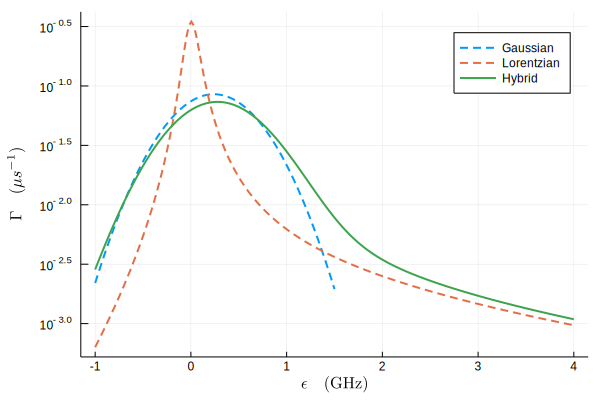

In [38]:
plot(x_axis_low, low_freq, yscale=:log10, label="Gaussian", linestyle=:dash, linewidth=2)
plot!(x_axis, high_freq, yscale=:log10, label="Lorentzian", linestyle=:dash, linewidth=2)
plot!(x_axis, mrt, yscale=:log10, label="Hybrid", linewidth=2)
xlabel!(L"\epsilon \quad (\mathrm{GHz})")
ylabel!(L"\Gamma \quad (\mu s^{-1})")